# Breast Cancer Text Mining Julia 

## Introduction
Breast cancer is the most common type of cancer diagnosed among women and is the second leading cause of cancer death. 3
Approximately 252,710 new cases of invasive breast cancer and 63,410 cases of in situ breast carcinoma were expected to be diagnosed among US women in 2017, and 40,610 women are expected to die from this disease alone.3 Overall, breast cancer mortality rates have decreased by 39%...

## Load Packages and Custom Function

In [1]:
# init project: this will install missing packages
include("src/init.jl")

# add all packages here
using DataFrames
using Gadfly
using Vega # for word cloud
using TextAnalysis #, DimensionalityReduction, Clustering
using Plotly
using Query

# Add all custom functions here
include("src/main.jl")
using bcTextmining # our package


Loaded /usr/lib/jvm/default-java/jre/lib/amd64/server/libjvm.so


## Analysis
Text mining can be used to discover these knowledge patterns or hypotheses in helping to solve biomedical questions. We will perform 3 analysis i.e on treatment, diagnosis and prevention

### Diagnosis
Starting by creating a dataframe of diagnosis metadata and text for the year 2008 to  2018. i.e search using medline and fetch full artcile from PMC (pubmed central) and store it as dataframe

In [52]:

df_full_text = @time bcTextmining.searchAndFetchFullArtcles("breast neoplasms","therapy",2008, 2018,100, true)

# # display all field except df_full_text 
df_full_text[:, filter(x -> x != :fullText, names(df_full_text))]

returning cached version, to fetch afresh please set cache=false
  7.596383 seconds (308.26 k allocations: 139.581 MiB, 1.95% gc time)


1100×6 DataFrames.DataFrame
│ Row  │ pmcid        │ pmid     │ date_published │
├──────┼──────────────┼──────────┼────────────────┤
│ 1    │ "PMC2605100" │ 19091007 │ 20081209       │
│ 2    │ "PMC2593616" │ 19052240 │ 20081203       │
│ 3    │ "PMC2592583" │ 19057737 │ NA             │
│ 4    │ "PMC2592581" │ 19057734 │ NA             │
│ 5    │ "PMC2605753" │ 19038028 │ 20081127       │
│ 6    │ "PMC2596175" │ 19032762 │ 20081125       │
│ 7    │ "PMC2612673" │ 19019216 │ 20081119       │
│ 8    │ "PMC2596126" │ 19014522 │ 20081113       │
│ 9    │ "PMC2582941" │ 19008355 │ 20081113       │
│ 10   │ "PMC2582583" │ 19004780 │ 20081112       │
│ 11   │ "PMC2588619" │ 19014435 │ 20081111       │
⋮
│ 1089 │ "PMC5736068" │ 27252076 │ 20160601       │
│ 1090 │ "PMC5739165" │ 27151593 │ 20160504       │
│ 1091 │ "PMC5844269" │ 26629881 │ NA             │
│ 1092 │ "PMC5736059" │ 27130722 │ 20160429       │
│ 1093 │ "PMC4840753" │ 27068834 │ 20160411       │
│ 1094 │ "PMC4840592" │ 27060073 │ 20160408       │
│ 1095 │ "PMC5863723" │ 26759983 │ NA             │
│ 1096 │ "PMC4823532" │ 27030458 │ 20160330       │
│ 1097 │ "PMC5875556" │ 27074490 │ 20160308       │
│ 1098 │ "PMC5868486" │ 27049782 │ 20160308       │
│ 1099 │ "PMC5483564" │ 26884078 │ 20160216       │
│ 1100 │ "PMC5483579" │ 26880826 │ 20160215       │

│ Row  │ title                                                                               │
├──────┼─────────────────────────────────────────────────────────────────────────────────────┤
│ 1    │ "Molecular imaging as a tool for translating breast cancer science."                │
│ 2    │ "Enhancing nuclear receptor-induced transcription requires nuclear motor and"       │
│ 3    │ "Surgical images: soft tissue: An unusual presentation of perforated sigmoid"       │
│ 4    │ "Geographic variation and physician specialization in the use of percutaneous"      │
│ 5    │ "Reliable microRNA profiling in routinely processed formalin-fixed"                 │
│ 6    │ "Gene expression variation between distinct areas of breast cancer measured from"   │
│ 7    │ "Dose volume histogram analysis of normal structures associated with accelerated"   │
│ 8    │ "Determinants of non attendance to mammography program in a region with high"       │
│ 9    │ "Dynamic NMR effects in breast cancer dynamic-contrast-enhanced MRI."               │
│ 10   │ "The magnetic resonance shutter speed discriminates vascular properties of"         │
│ 11   │ "Quality of life in patients with breast cancer before and after diagnosis: an"     │
⋮
│ 1089 │ "Protective Effect of Aerobic Physical Activity on Sleep Behavior in Breast Cancer" │
│ 1090 │ "Effects of a Community-Based Multimodal Exercise Program on Health-Related"        │
│ 1091 │ "Initial Surgery and Survival in Stage IV Breast Cancer in the United States,"      │
│ 1092 │ "Relationship Between Breast Density and Selective Estrogen-Receptor Modulators,"   │
│ 1093 │ "Right atrial mass in a patient with breast cancer: percutaneous transcatheter"     │
│ 1094 │ "Inflammatory breast cancer in a previously treated case of breast cancer: a"       │
│ 1095 │ "Mammography Use Among Medicare Beneficiaries After Elimination of Cost Sharing."   │
│ 1096 │ "Atypical case of ecthyma gangrenosum mimicking a breast cancer recurrence."        │
│ 1097 │ "A novel method for radiotherapy patient identification using surface imaging."     │
│ 1098 │ "Prognostic Value of Circulating Tumor Cells Identified prior to Surgical"          │
│ 1099 │ "Multimodality imaging and management of an asymptomatic saccular LAD aneurysm."    │
│ 1100 │ "Radiographically occult intrasinusoidal liver metastases leading to hepatic"       │

│ Row  │ year │ pmcUrl                                                     │
├──────┼──────┼────────────────────────────────────────────────────────────┤
│ 1    │ 2008 │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2605100/pdf" │
│ 2    │ 2008 │ "https://www.ncbi.nlm.nih.gov/pmc/articles/P

Before we do any data cleaning lets make sure that the articles are relevant by plotting wordcloud

In [3]:
sample_size = 5 # sample 2 articels 
articles_array =df_full_text[:fullText]
 wc = wordcloud(x = sample(articles_array,sample_size))
 colorscheme!(wc, palette = ("Spectral", 11))

Vega.VegaVisualization
  name: String "wordcloud"
  width: Int64 800
  height: Int64 400
  padding: String "auto"
  viewport: Void nothing
  background: Void nothing
  data: Array{Vega.VegaData}((1,))
  scales: Array{Vega.VegaScale}((1,))
  axes: Void nothing
  marks: Array{Vega.VegaMark}((1,))
  legends: Void nothing
  signals: Void nothing
  predicates: Void nothing
  modify: Void nothing

### Data Cleaning 
Looks like we have to clean and remove a few stop words.


In [4]:
#include("src/clean-data.jl")
# conver to corpus
arrayOfSdDoc = []
arrayOfStrText = []
for row in eachrow(df_full_text)
    sd,tx=bcTextmining.cleanText(row[:fullText])
    push!(arrayOfSdDoc,sd)
    push!(arrayOfStrText,tx)
end

# convert to corpus
corpus = Corpus(arrayOfSdDoc)
#standardize
standardize!(corpus, StringDocument)
#normalizes 
#stem!(corpus) # merges words like survival and survive

After cleaning...

In [129]:
sample_size =5 # sample size
 wc = wordcloud(x = sample(arrayOfStrText,sample_size))
 colorscheme!(wc, palette = ("Spectral", 11))



Vega.VegaVisualization
  name: String "wordcloud"
  width: Int64 800
  height: Int64 400
  padding: String "auto"
  viewport: Void nothing
  background: Void nothing
  data: Array{Vega.VegaData}((1,))
  scales: Array{Vega.VegaScale}((1,))
  axes: Void nothing
  marks: Array{Vega.VegaMark}((1,))
  legends: Void nothing
  signals: Void nothing
  predicates: Void nothing
  modify: Void nothing

### Start Analysis

  0.000109 seconds (60 allocations: 6.656 KiB)


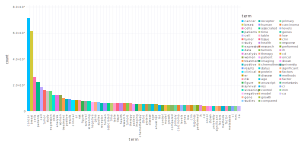

In [6]:
#set_default_plot_size(30cm, 15cm)

update_lexicon!(corpus)
#update_inverse_index!(corpus)
lexicon_df = DataFrame(term=collect(keys(corpus.lexicon)), count=collect(values(corpus.lexicon)))
lexicon_df,plot =bcTextmining.fetchTopNTopic(lexicon_df,4000)
plot


In [7]:
lexicon_df

# save to csv
#writetable("output/dagnosis-lexicon.csv",lexicon_df)

67×2 DataFrames.DataFrame
│ Row │ term          │ count │
├─────┼───────────────┼───────┤
│ 1   │ "cancer"      │ 71778 │
│ 2   │ "breast"      │ 61532 │
│ 3   │ "cells"       │ 26471 │
│ 4   │ "patients"    │ 22749 │
│ 5   │ "cell"        │ 18938 │
│ 6   │ "tumor"       │ 16213 │
│ 7   │ "study"       │ 15880 │
│ 8   │ "expression"  │ 15589 │
│ 9   │ "data"        │ 12760 │
│ 10  │ "analysis"    │ 12673 │
│ 11  │ "women"       │ 12435 │
⋮
│ 56  │ "cd"          │ 4444  │
│ 57  │ "oncol"       │ 4406  │
│ 58  │ "shown"       │ 4393  │
│ 59  │ "university"  │ 4305  │
│ 60  │ "significant" │ 4296  │
│ 61  │ "factors"     │ 4279  │
│ 62  │ "methods"     │ 4232  │
│ 63  │ "factor"      │ 4183  │
│ 64  │ "metastasis"  │ 4124  │
│ 65  │ "ci"          │ 4089  │
│ 66  │ "mm"          │ 4088  │
│ 67  │ "ca"          │ 4047  │

  0.228065 seconds (83.15 k allocations: 4.670 MiB)


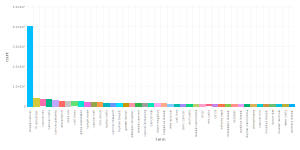

In [8]:

# merge all articles
full_text_array = Array(df_full_text[:fullText])
# generate plot
df_full_n2,plot =bcTextmining.fetchNgramTopic(full_text_array,1000,2)
plot

#df_full


In [9]:
n=length(df_full_n2)
df_full_n2
# save to file
#writetable("output/dagnosis-2gram.csv",df_full_n2)


42×3 DataFrames.DataFrame
│ Row │ term                │ count │ size │
├─────┼─────────────────────┼───────┼──────┤
│ 1   │ "breast cancer"     │ 40559 │ 2    │
│ 2   │ "ih anuscript"      │ 4416  │ 2    │
│ 3   │ "cancer res"        │ 3906  │ 2    │
│ 4   │ "cancer cells"      │ 3553  │ 2    │
│ 5   │ "cancer patients"   │ 3485  │ 2    │
│ 6   │ "anuscript ih"      │ 3015  │ 2    │
│ 7   │ "mda mb"            │ 2988  │ 2    │
│ 8   │ "cell lines"        │ 2635  │ 2    │
│ 9   │ "gene expression"   │ 2556  │ 2    │
│ 10  │ "lymph node"        │ 2366  │ 2    │
│ 11  │ "cancer cell"       │ 2217  │ 2    │
⋮
│ 31  │ "volume issue"      │ 1145  │ 2    │
│ 32  │ "metastatic breast" │ 1135  │ 2    │
│ 33  │ "res treat"         │ 1134  │ 2    │
│ 34  │ "positive breast"   │ 1124  │ 2    │
│ 35  │ "ductal carcinoma"  │ 1073  │ 2    │
│ 36  │ "plos plosone"      │ 1070  │ 2    │
│ 37  │ "cancer clin"       │ 1064  │ 2    │
│ 38  │ "invasive breast"   │ 1058  │ 2    │
│ 39  │ "tumor size"        │ 1048  │ 2    │
│ 40  │ "overall survival"  │ 1045  │ 2    │
│ 41  │ "stem cells"        │ 1035  │ 2    │
│ 42  │ "primary breast"    │ 1014  │ 2    │

** cd cd** - The CD, or Cluster of Differential proteins are a family of type I transmembrane glycoproteins widely expressed in immune cell populations [The CD(4)(+)CD(25)(+) regulatory T cells in peripheral blood of patients with breast cancer is significantly increased in comparison with that in patients with benign breast tumor ]

**mda mb cells** - is a breast cancer cell

**cell lines** - associate with mda mb

**lymph node** - bc cells have been found in lymbh node

**estrogen receptor** - Why is knowing hormone receptor status important during daignosis https://www.cancer.org/cancer/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-hormone-receptor-status.html 

**mcf cells** - 

**breast carcinoma** - 

**gene expression** -

**mb cells** - 

**metastatic breast** -

**invasive breast** -

**triple negative** - According to the status of ER, PR, HER2, breast cancer is classified as luminal A, luminal B, HER2 positive, and triple negative


  0.028130 seconds (135 allocations: 9.094 KiB)


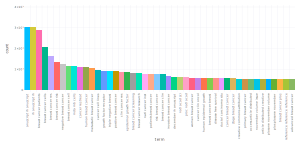

In [10]:

# generate plot
df_full_n3,plot =bcTextmining.fetchNgramTopic(full_text_array,500,3)
plot
#df_full

In [61]:
# save it as excel
#writetable("output/dagnosis-3gram.csv",df_full_n3)

# print head
df_full_n3

28×3 DataFrames.DataFrame
│ Row │ term                      │ count │ size │
├─────┼───────────────────────────┼───────┼──────┤
│ 1   │ "breast cancer patients"  │ 2091  │ 3    │
│ 2   │ "breast cancer cells"     │ 1570  │ 3    │
│ 3   │ "breast cancer res"       │ 1151  │ 3    │
│ 4   │ "breast cancer risk"      │ 1020  │ 3    │
│ 5   │ "negative breast cancer"  │ 945   │ 3    │
│ 6   │ "cancer res treat"        │ 909   │ 3    │
│ 7   │ "breast cancer cell"      │ 881   │ 3    │
│ 8   │ "ud udc ud"               │ 869   │ 3    │
│ 9   │ "mda mb cells"            │ 862   │ 3    │
│ 10  │ "udc ud udc"              │ 823   │ 3    │
│ 11  │ "human breast cancer"     │ 783   │ 3    │
⋮
│ 17  │ "growth factor receptor"  │ 683   │ 3    │
│ 18  │ "natl cancer inst"        │ 646   │ 3    │
│ 19  │ "positive breast cancer"  │ 642   │ 3    │
│ 20  │ "breast cancer research"  │ 618   │ 3    │
│ 21  │ "epidermal growth factor" │ 602   │ 3    │
│ 22  │ "clin cancer res"         │ 579   │ 3    │
│ 23  │ "breast cancer clin"      │ 558   │ 3    │
│ 24  │ "risk breast cancer"      │ 556   │ 3    │
│ 25  │ "breast cancer screening" │ 554   │ 3    │
│ 26  │ "november volume issue"   │ 534   │ 3    │
│ 27  │ "plosone november volume" │ 519   │ 3    │
│ 28  │ "patients breast cancer"  │ 506   │ 3    │


**breast cancer cells**	 - http://www.nationalbreastcancer.org/breast-cancer-stage-0-and-stage-1

**igf induce hif** - Based on the growing body of evidence demonstrating IGF-1-induced HIF-1 activity, and thus the potential contributions of this growth 


**epidermal growth factor** -

**ductal carcinoma situ** - Carcinoma in situ (CIS), also known as in situ neoplasm, is a group of abnormal cells. While they are a form of neoplasm, there is disagreement over whether CIS should be classified as cancer.


### Treatment Trends
https://www.cancer.net/cancer-types/breast-cancer/treatment-options

* Surgery is the removal of the tumor and some surrounding healthy tissue during an operation
* Radiation therapy is the use of high-energy x-rays or other particles to destroy cancer cells. 
* Systemic therapy is treatment taken by mouth or through a vein that gets into the bloodstream to reach cancer cells wherever they may be in the body
* Chemotherapy is the use of drugs to destroy cancer cells, usually by ending the cancer cells’ ability to grow and divide
* Hormonal therapy, also called endocrine therapy, is an effective treatment for most tumors that test positive for either estrogen or progesterone receptors (called ER-positive or PR-positive; 
* Targeted therapy is a treatment that targets the cancer’s specific genes, proteins, or the tissue environment that contributes to cancer growth and survival.

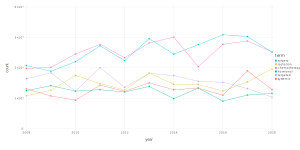

In [15]:
# here is how to generate trends
# first define an array of terms/concepts/cells/genes e.t.c
terms = ["surgery","radiation","chemotherapy", "hormonal", "targeted", "systemic"]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Surgery trends
https://www.cancer.net/cancer-types/breast-cancer/treatment-options
**Lumpectomy.** - This is the removal of the tumor and a small, cancer-free margin of healthy tissue around the tumor. Most of the breast remains. For invasive cancer, radiation therapy to the remaining breast tissue is generally recommended after surgery. For DCIS, radiation therapy after surgery may be an option depending on the patient and the tumor. A lumpectomy may also be called breast-conserving surgery, a partial mastectomy, quadrantectomy, or a segmental mastectomy.

**Mastectomy. ** -This is the surgical removal of the entire breast. There are several types of mastectomies. Talk with your doctor about whether the skin can be preserved, called a skin-sparing mastectomy, or the nipple, called a total skin-sparing mastectomy.

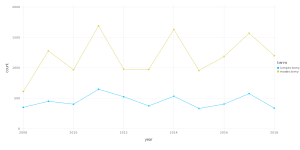

In [16]:

terms = ["lumpectomy","mastectomy"
        ]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Lumpectomy  surgery trends
 
Cancer cells can be found in the axillary lymph nodes in some cancers. It is important to find out whether any of the lymph nodes near the breast contain cancer. 

**Sentinel lymph node biopsy..** in a sentinel lymph node biopsy, the surgeon finds and removes a small number of lymph nodes from under the arm that receive lymph drainage from the breast. This procedure helps avoid removing multiple lymph nodes in an axillary lymph node dissection 

**Axillary lymph node dissection.**. In an axillary lymph node dissection, the surgeon removes many lymph nodes from under the arm. These are then examined by a pathologist for cancer cells. The actual number of lymph nodes removed varies from person to person 

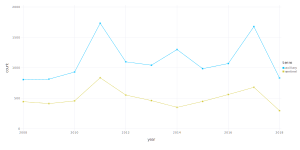

In [23]:

terms = ["axillary","sentinel"
        ]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Masectomy  surgery trends
 
Women who have a mastectomy may want to consider breast reconstruction. The techniques discussed below are typically used to shape a new breast.

**Implants.** A breast implant uses saline-filled or silicone gel-filled forms to reshape the breast.

**Tissue flap procedures**. These techniques use muscle and tissue from elsewhere in the body to reshape the breast. 

**Transverse rectus abdominis muscle (TRAM) flap**. This method, which can be done as a pedicle flap or free flap, uses muscle and tissue from the lower stomach wall.

**Latissimus dorsi flap**. This pedicle flap method uses muscle and tissue from the upper back.

**Deep inferior epigastric artery perforator (DIEP) flap**. The DIEP free flap takes tissue from the abdomen and the surgeon attaches the blood vessels to the chest wall. 

**Gluteal free flap**. The gluteal free flap uses tissue and muscle from the buttocks to create the breast, and the surgeon also attaches the blood vessels. 

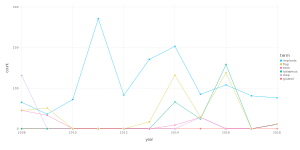

In [18]:
# http://www.breastcancer.org/symptoms/testing/types
# https://www.mayoclinic.org/diseases-conditions/breast-cancer/diagnosis-treatment/drc-20352475
terms = ["implants","flap", "tram", "latissimus", "diep", "gluteal "
        ]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Trends in Radiation therapy
Radiation therapy may be given after or before surgery:
* Adjuvant radiation therapy is given after surgery. 
* Neoadjuvant radiation therapy is radiation therapy given before surgery to shrink a large tumor, 

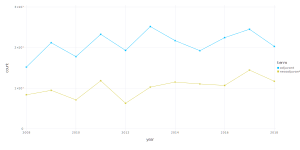

In [19]:

terms = ["adjuvant","neoadjuvant"]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Trends in Radiation therapy schedules

**irradiation (PBI)** is radiation therapy that is given directly to the tumor area instead of the entire breast. It is more common after a lumpectomy..

**Intensity-modulated radiation therapy (IMRT)** is a more advanced way to give external-beam radiation therapy to the breast.

**Proton therapy.** Standard radiation therapy for breast cancer uses x-rays, also called photon therapy, to kill cancer cells. Proton therapy is a type of external-beam radiation therapy that uses protons rather than x-rays.


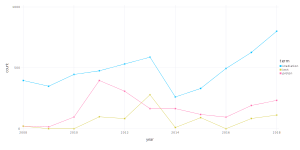

In [26]:

terms = ["irradiation", "imrt", "proton"]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

###  Trends in Chemotherapy
 There are many types of chemotherapy used to treat breast cancer. Common drugs include:
Capecitabine (Xeloda)
Carboplatin (Paraplatin)
Cisplatin (Platinol)
Cyclophosphamide (Neosar)
Docetaxel (Docefrez, Taxotere)
Doxorubicin (Adriamycin)
Pegylated liposomal doxorubicin (Doxil)
Epirubicin (Ellence)
Fluorouracil (5-FU, Adrucil)
Gemcitabine (Gemzar)
Methotrexate (multiple brand names)
Paclitaxel (Taxol)
Protein-bound paclitaxel (Abraxane)
Vinorelbine (Navelbine)
Eribulin (Halaven)
Ixabepilone (Ixempra)
#### All Drugs
 

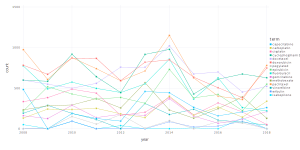

In [47]:

terms = ["capecitabine", "carboplatin", "cisplatin", "cyclophosphamide", "docetaxel",
        "doxorubicin", "pegylated", "epirubicin"
        , "fluorouracil", "gemcitabine", "methotrexate",
        "paclitaxel", "vinorelbine", "eribulin", "ixabepilone"
]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

### Top 5 drugs

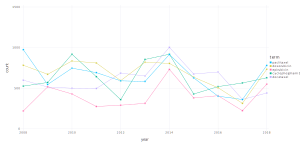

In [54]:

terms = ["paclitaxel", "doxorubicin", "epirubicin", "cyclophosphamide", "docetaxel"
        #"doxorubicin", "pegylated", "epirubicin"
        #, "fluorouracil", "gemcitabine", "methotrexate",
        #"paclitaxel", "vinorelbine", "eribulin", "ixabepilone"
]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

### 2+ Drug analysis

A patient may receive 1 drug at a time or combinations of different drugs given at the same time. Research has shown that combinations of certain drugs are sometimes more effective than single drugs for adjuvant treatment. 

AC (doxorubicin and cyclophosphamide)

AC or EC (epirubicin and cyclophosphamide) followed by T (doxorubicin and cyclophosphamide, followed by paclitaxel or docetaxel, or the reverse)

CAF (cyclophosphamide, doxorubicin, and 5-FU)

CEF (cyclophosphamide, epirubicin, and 5-FU)

CMF (cyclophosphamide, methotrexate, and 5-FU)

EC (epirubicin, cyclophosphamide)

TAC (docetaxel, doxorubicin, and cyclophosphamide)

TC (docetaxel and cyclophosphamide)


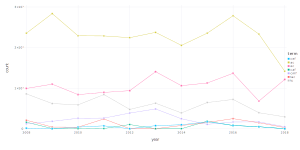

In [51]:

terms = ["cef", "ac", "ec", "caf", "cef", "cmf", "ec", "tac", "tc"]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

### HER2 receptor  Drug analysis

Therapies that target the HER2 receptor may be given with chemotherapy for HER2-positive breast cancer (see Targeted therapy, below). An example is the antibody trastuzumab. Combination regimens for HER2-positive breast cancer may include:

ACTH (doxorubicin, cyclophosphamide, paclitaxel, trastuzumab)
TCH (docetaxel, carboplatin, trastuzumab)
TH (paclitaxel, trastuzumab)
THP (paclitaxel or docetaxel, trastuzumab, pertuzumab)
TCHP (docetaxel, carboplatin, trastuzumab, pertuzumab)


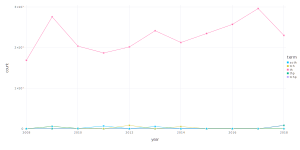

In [50]:

terms = ["acth", "tch", "th","thp", "tchp"]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

### Hormonal therapy trends

Blocking the hormones can help prevent a cancer recurrence and death from breast cancer when used either by itself or after adjuvant or neoadjuvant chemotherapy.

**Tamoxifen.** Tamoxifen is a drug that blocks estrogen from binding to breast cancer cells. It is effective for lowering the risk of recurrence in the breast that had cancer, the risk of developing cancer in the other breast, and the risk of distant recurrence.

**Aromatase inhibitors (AIs).** AIs decrease the amount of estrogen made in tissues other than the ovaries in postmenopausal women by blocking the aromatase enzyme. This enzyme changes weak male hormones called androgens into estrogen when the ovaries have stopped making estrogen during menopause. 

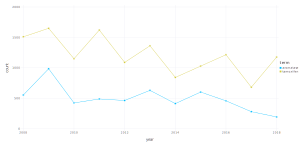

In [35]:

terms = ["aromatase","tamoxifen" ]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

### Targeted therapy trends ( Personalized Medicine)

Targeted therapy is a treatment that targets the cancer’s specific genes, proteins, or the tissue environment that contributes to cancer growth and survival. These treatments are very focused and work differently than chemotherapy. This type of treatment blocks the growth and spread of cancer cells while limiting damage to healthy cells.

#### HER2-targeted therapy

**Trastuzumab. ** This drug is approved as a therapy for non-metastatic HER2-positive breast cancer. Currently, patients with stage I to stage III breast cancer

**Pertuzumab (Perjeta)**. This drug is approved as part of neoadjuvant treatment for breast cancer in combination with trastuzumab and chemotherapy.

**Ado-trastuzumab emtansine or T-DM1 (Kadcyla)**. T-DM1 is a combination of trastuzumab linked to a type of chemotherapy. This allows the drug to deliver chemotherapy into the cancer cell while reducing the chemotherapy received by healthy cells. T-DM1 is approved to treat metastatic breast cancer, and studies are now testing T-DM1 as a treatment for early-stage breast cancer.

** Neratinib (Nerlynx).** This oral drug is approved as a treatment for higher-risk HER2-positive, early-stage breast cancer. It is taken for a year, starting after patients have finished 1 year of trastuzumab.

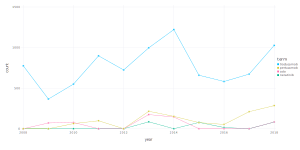

In [38]:

terms = ["trastuzumab","pertuzumab", "ado", "neratinib" ]
trend_df = bcTextmining.generateTrends(df_full_text,terms,2008,2018 )
Gadfly.plot(trend_df, x="year", y="count", color="term", Geom.point, Geom.line)

In [ ]:

 #convert(DataFrame, d)
#plot(corpus.lexicon, x="SepalLength", y="SepalWidth", Geom.point)
#plot(x=rand(10), y=rand(10))
#NGramCorpus(corpus)

# corpus_df =convert(DataFrame, corpus)

# m = DocumentTermMatrix(corpus)

# D = dtm(m, :dense)# D

## Appendix




In [9]:
# using R code
